<a href="https://colab.research.google.com/github/Swastik3025/Brain_tumor-Classification/blob/main/Colab%20Notebook/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping the Train and Test data

In [3]:
!unzip drive/"MyDrive"/Brain_tumor.zip

Streaming output truncated to the last 5000 lines.
  inflating: Brain_tumor/Training/glioma/Tr-gl_0725.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0726.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0727.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0728.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0729.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0730.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0731.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0732.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0733.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0734.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0735.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0736.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0737.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0738.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0739.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0740.jpg  
  inflating: Brain_tu

Importing Libraries

In [4]:
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from random import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPool2D,AvgPool2D,Dropout,Flatten,Dense
from keras.models import Sequential

In [5]:
Train_dir='/content/Brain_tumor/Training'
Test_dir='/content/Brain_tumor/Testing'
print('Path succesfully copied to variables')

Path succesfully copied to variables


In [6]:
labels=['glioma','meningioma','notumor','pituitary']
img_size=128

In [7]:
image_gen=ImageDataGenerator(rotation_range=15,zoom_range=0.1,rescale=1./255)

In [8]:
Train_load=image_gen.flow_from_directory(directory=Train_dir,target_size=(128,128),batch_size=32,seed=21)
Test_load=image_gen.flow_from_directory(directory=Test_dir,target_size=(128,128),batch_size=32,seed=21)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
import math
print("Approx Train to Test ratio:",math.trunc(5712/1311))

Approx Train to Test ratio: 4


In [10]:
Train_load.class_indices #this is a python dictionary

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [11]:
classes={value:key for key,value in Train_load.class_indices.items()}
print(classes)

{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


Model Architecture

In [12]:
#Model Creation
model=Sequential()
# 1st Convolution layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 2nd Convolution layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#3rd Convolution layer
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Flattening and Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))  #output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        36928     
                                                        

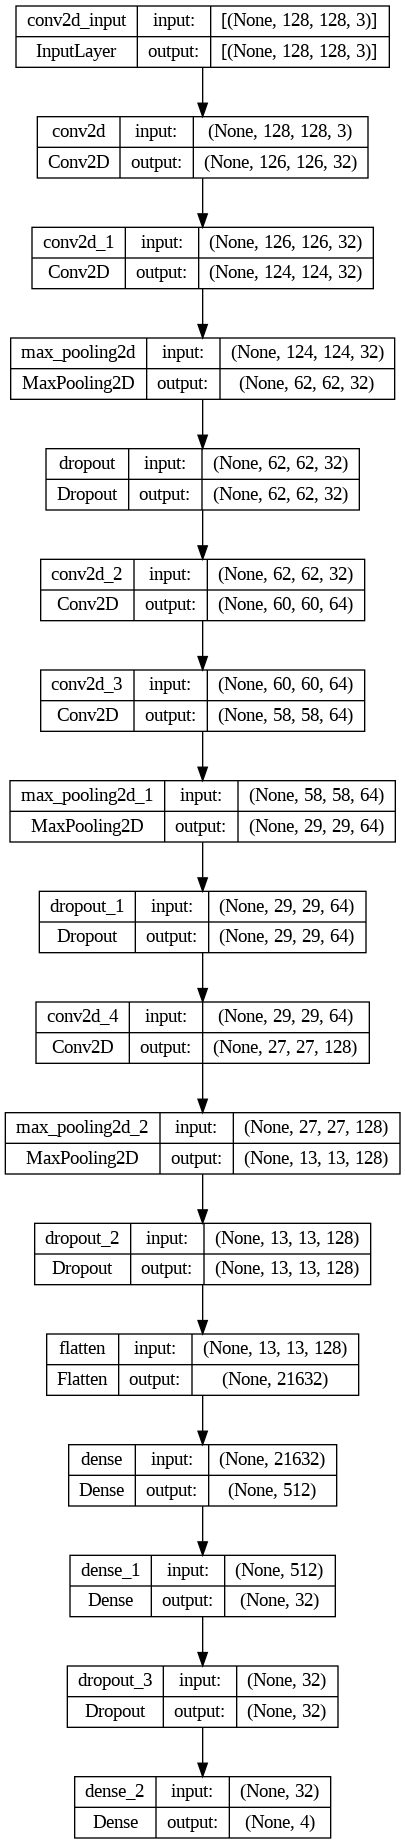

In [13]:
# Model Architecture
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print('Model Compilation successful!')

Model Compilation successful!


In [15]:
#Steps
Train_steps=len(Train_load)
Test_steps=len(Test_load)

In [16]:
history=model.fit_generator(generator=Train_load,steps_per_epoch=Train_steps,epochs=40,validation_data=Test_load,validation_steps=Test_steps)

<ipython-input-16-f752b915c100>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=Train_load,steps_per_epoch=Train_steps,epochs=40,validation_data=Test_load,validation_steps=Test_steps)


Epoch 1/40
179/179 [==============================] - 64s 269ms/step - loss: 1.0901 - accuracy: 0.4984 - val_loss: 0.8645 - val_accuracy: 0.6583
Epoch 2/40
179/179 [==============================] - 47s 263ms/step - loss: 0.8322 - accuracy: 0.6558 - val_loss: 0.6574 - val_accuracy: 0.7155
Epoch 3/40
179/179 [==============================] - 49s 275ms/step - loss: 0.7137 - accuracy: 0.7061 - val_loss: 0.6043 - val_accuracy: 0.7452
Epoch 4/40
179/179 [==============================] - 45s 254ms/step - loss: 0.6027 - accuracy: 0.7651 - val_loss: 0.5318 - val_accuracy: 0.7704
Epoch 5/40
179/179 [==============================] - 45s 253ms/step - loss: 0.5101 - accuracy: 0.8058 - val_loss: 0.4274 - val_accuracy: 0.8108
Epoch 6/40
179/179 [==============================] - 47s 264ms/step - loss: 0.4777 - accuracy: 0.8251 - val_loss: 0.4278 - val_accuracy: 0.8261
Epoch 7/40
179/179 [==============================] - 47s 261ms/step - loss: 0.4012 - accuracy: 0.8554 - val_loss: 0.4776 - val_ac

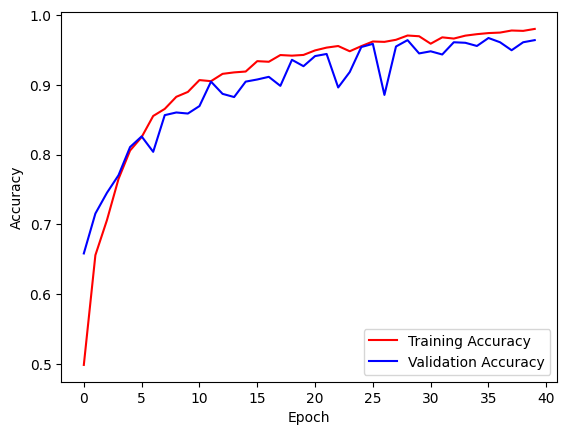

In [19]:
#Accuracy Graphs
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

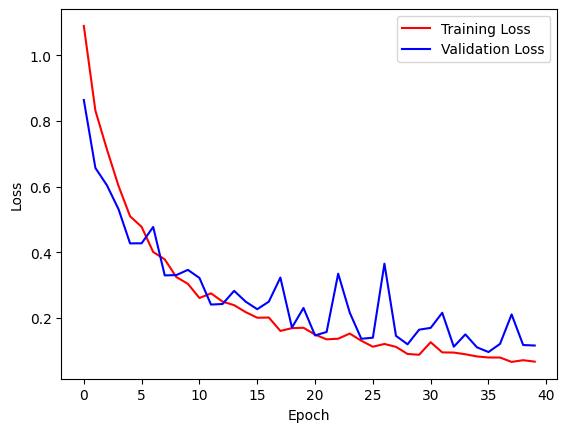

In [20]:
#loss graphs
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
#saving the model
from keras.models import save_model
save_model(model,'/content/drive/MyDrive/Brain_tumor_ver1.h5')